In [1]:
# import lib
import os
import numpy as np

In [2]:
# define variables 
labels = ['correct mask', 'incorrect mask', 'not mask']
prototxtPath = './face_detector/deploy.prototxt'
weightsPath = './face_detector/res10_300x300_ssd_iter_140000.caffemodel'

In [3]:
import cv2
from keras.models import load_model

# Load model mask classifier
mask_classifier = load_model('./mask_classifier/best_model_300x400_v3.h5')

# Load model face detector
face_detector = cv2.dnn.readNet(prototxtPath, weightsPath)

1024 1024
[INFO] computing face detections...
[ 593.24865723  513.66772461 1147.12756348 1269.03088379]


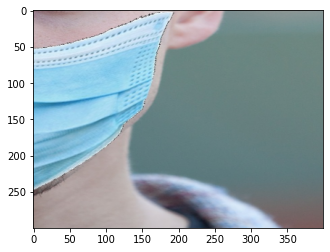

[252.8659668  190.34918213 789.93518066 929.1260376 ]


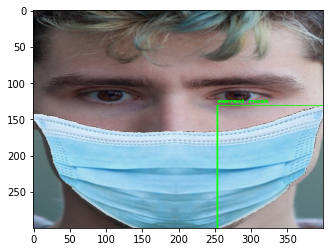

[2383.20410156 2243.94287109 2947.25       2985.20996094]
[2370.25537109 3079.24804688 2955.12207031 3807.08837891]
[1772.0715332  2206.83618164 2298.19775391 2997.55737305]


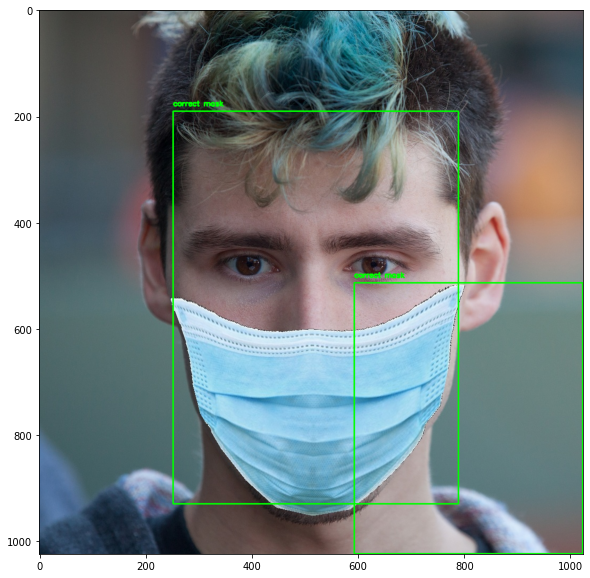

In [12]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input

image = cv2.imread('./datasets/original/correct_mask/00015_Mask.jpg')
orig = image.copy()
(h, w) = image.shape[:2]

print(h, w)
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (400, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
face_detector.setInput(blob)
detections = face_detector.forward()

labels = ['correct mask', 'incorrect mask', 'not mask']
colors = [(0, 255, 0), (0, 255, 255), (0, 0, 255)]

for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with
    # the detection
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is
    # greater than the minimum confidence
    if confidence > 0.7:
        # compute the (x, y)-coordinates of the bounding box for
        # the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        print(box)
        (startX, startY, endX, endY) = box.astype("int")

        # ensure the bounding boxes fall within the dimensions of
        # the frame
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
        
        try:
            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = image[startY:endY, startX:endX]

            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (400, 300))
            face = img_to_array(face)

            plt.imshow(face / 255)
            plt.show()

            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)



            # pass the face through the model to determine if the face
            # has a mask or not
            pred = mask_classifier.predict(face)

            # determine the class label and color we'll use to draw
            # the bounding box and text
            index_ = np.argmax(pred)
            label = labels[index_] #"Mask" if mask > withoutMask else "No Mask"
            color = colors[index_] #if label == "Mask" else (0, 0, 255)


            # display the label and bounding box rectangle on the output
            # frame
            cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
            cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
        except:
            continue

    # show the output image
#     cv2.imshow("Output", image)
#     cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

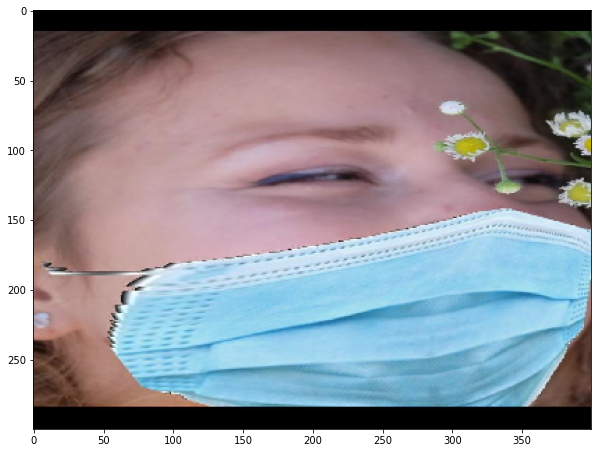

array([[9.8025024e-01, 1.9746453e-02, 3.2411633e-06]], dtype=float32)

In [17]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input

#load the image
my_image = load_img("./datasets/processed/correct_mask/03802_Mask.jpg", target_size=(300, 400))

plt.figure(figsize=(10, 10))
plt.imshow(my_image)
plt.show()

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = mask_classifier.predict(my_image)
prediction

In [23]:
import numpy as np
print(labels[np.argmax(prediction)])
print(round(np.max(prediction) * 100, 2))

correct mask
98.03


In [5]:
import cv2

stream = cv2.VideoCapture('https://192.168.1.3:4343/video')

# Use the next line if your camera has a username and password
# stream = cv2.VideoCapture('protocol://username:password@IP:port/1')  
run = True
try:
    while run:

        r, f = stream.read()
        cv2.imshow('IP Camera stream',f)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            run = False

    cv2.destroyAllWindows()
except:
    run = False